# Load the data

In [9]:
import pandas as pd

# completed_deals = pd.read_csv('../data/completed-or-current-deails-2019-10-29.csv')
# lost_deals = pd.read_csv('../data/lost-deals-2019-10-28-1.csv')




completed_deals = pd.read_csv('../data/closed-deals-with-mined-companies-data.csv', index_col=0)
lost_deals = pd.read_csv('../data/lost-deals-with-mined-companies-data.csv', index_col=0)
completed_deals['Deal Stage'] = 1
lost_deals['Deal Stage'] = 0

# Concatenate lost and completed deals into 1 dataframe

In [10]:
deals_df = pd.concat([completed_deals, lost_deals], sort=False)

deals_df.tail()

,Deal ID,Deal Name_x,Deal owner,Deal Stage_x,Sales Lead,Designated Office,Director,Industry_x,Source,Associated Company ID,...,LinkedIn description,LinkedIn size,LinkedIn specialties,LinkedIn established,LinkedIn id,LinkedIn url,LinkedIn Industry,Aggregated Industry,Deal Stage,Business Lines
828,262701286,Hockey Protege,NaN,0,NaN,Chicago,Doug Bradbury,E-commerce,NaN,727079827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E-commerce,0,Product Design and Delivery
829,262701284,IDEO - BMO - Plan B auth,Paul Pagel,0,Paul Pagel,Chicago,Gustin Prudner (Deactivated User),NaN,NaN,"726952002, 726952210",...,"At BMO Harris, banking is our personal commitm...","5,001-10,000","Commercial Banking, Personal Banking, Small Bu...",NaN,bmo-harris-bank,https://www.linkedin.com/company/bmo-harris-ba...,Banking,Finance,0,Product Design and Delivery
830,262701281,Follett School Solutions,Margaret Pagel,0,NaN,NaN,NaN,NaN,NaN,727321304,...,Buy K-12 used textbooks and new books online. ...,51-200,NaN,1873.0,follett-educational-services-inc.,https://www.linkedin.com/company/follett-educa...,Publishing,Media and Entertainment,0,NaN
831,262701280,UBS,Margaret Pagel,0,Margaret Pagel,Chicago,NaN,NaN,NaN,727079967,...,NaN,NaN,NaN,NaN,company,https://www.linkedin.com/company/company/about/,NaN,NaN,0,NaN
832,262701271,Submarine Quest,Jim Suchy,0,NaN,London,Jim Suchy,NaN,NaN,726952036,...,Enigma Quests creates real life adventure expe...,2-10,NaN,2014.0,enigma-quests,https://www.linkedin.com/company/enigma-quests...,Entertainment,Media and Entertainment,0,Consulting


In [ ]:
#deals_df.to_csv('../data/all-deals.csv')

In [164]:
responsible_preson_column = 'Sales Lead'

In [165]:
deals_single_company = deals_df.groupby('Associated Company')
deals_df = deals_single_company['Associated Company', 'Industry', 'Designated Office', 'Source', responsible_preson_column, 'Deal Stage', 'Deal ID'].first()

In [157]:
deals_df[responsible_preson_column].value_counts()

Margaret Pagel                    399
Paul Pagel                         74
Dennis Moore                       42
Gary Gentry (Deactivated User)     37
Jenn Imamura                       21
Ryan Verner                         7
Joseph Brown                        7
Jim Suchy                           6
Jim Remsik (Deactivated User)       5
heather corallo                     4
Doug Bradbury                       2
Dave Moore                          2
Malcolm Newsome                     2
Colin Jones                         1
Name: Sales Lead, dtype: int64

# Filter out outlayers

In [39]:
is_not_Margaret = ~(deals_df[responsible_preson_column]=='Margaret Pagel')
deals_df = deals_df[is_not_Margaret]

deals_df.count()

Associated Company    506
Industry              184
Designated Office     431
Source                196
Deal owner            474
Deal Stage            506
dtype: int64

## And some empty data cleanup

In [11]:
df = deals_df[['Aggregated Industry', 'Source', 'LinkedIn size', 'Deal Stage']].copy()

In [12]:
is_not_empty_industry = ~df['Aggregated Industry'].isnull()

df = df[is_not_empty_industry]

df['Deal Stage'].value_counts()

0    772
1    390
Name: Deal Stage, dtype: int64

In [78]:
is_not_empty_office = ~df['Designated Office'].isnull()

df = df[is_not_empty_office]

df['Deal Stage'].value_counts()

0    126
1    107
Name: Deal Stage, dtype: int64

# Factorizing features

In [168]:
df['Source'].value_counts()

Existing client referral    38
Employee Referral           27
Referral                    20
Upsell                      16
Website                     10
Extension                    4
Expansion                    4
Cold Call                    2
Trade Show                   2
None                         1
EO                           1
Name: Source, dtype: int64

In [13]:
df['Aggregated Industry'] = df['Aggregated Industry'].factorize()[0]
df['Source'] = df['Source'].factorize()[0]
df['LinkedIn size'] = df['LinkedIn size'].factorize()[0]
#df[responsible_preson_column] = df[responsible_preson_column].factorize()[0]

df.count()

Aggregated Industry    1162
Source                 1162
LinkedIn size          1162
Deal Stage             1162
dtype: int64

# Draw correlation

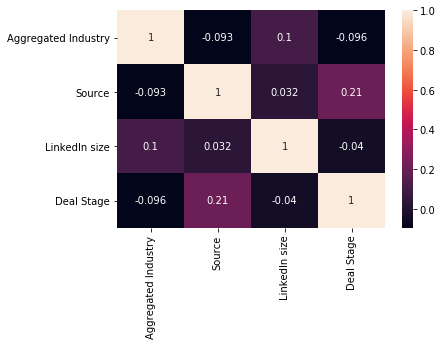

In [15]:
correlation = df.corr()

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(correlation, annot=True)

## Heatmap fix
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()